# Домашнее задание "Визуализация данных в Python"

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Скачаем датасет Данные IMDB. Распаковываем и смотрим содержимое датасета. 

In [2]:
movies_data = pd.read_csv('tmdb_5000_movies.csv')
movies_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


Мне интересно посмотреть сравнение топ-5 языков, на которых снимают фильмы. производства. В визуализации участвует original_language и id. Круговая диаграмма прекрасно подходит в данной ситуации, чтобы показать, что подавляющее большинство снимается и производится на английском языке. Вывод: хочешь смотреть хорошие фильмы - надо учить английский. А из большего количества фильмов найти хороший вероятность больше. На результаты может влиять источник датасета, ориентированный на англоговорящую аудиторию

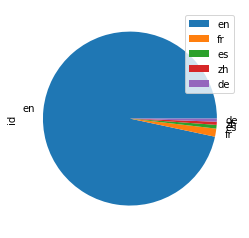

In [3]:
movies_data_distribution= movies_data.groupby(['original_language']).count().sort_values(by='id', ascending=False).head(5)
movies_data_distribution.plot(kind='pie', y='id')

рассмотрим boxplot распределения длины названия фильмов. Односложно или длиннее, чтобы отразить частично суть. 
Вохплот показывать, что чаще использую менее 15 знаков, одно или два слова). Но есть "выбросы" от 35 и более.

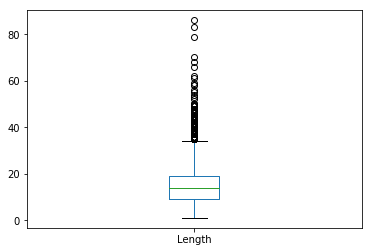

In [27]:
movies_data['Length'] = movies_data['original_title'].map(len)
movies_data['Length'].plot(kind='box')


Рассмотрим распределение оценок пользователей, чтобы заранее оценить "качество" фильмов. Большая часть фильмов в базе "среднего качества", т.е. рейтинг 6-7 баллов. Стоит заметить, что гистограмма смещенная, есть фильмы с рейтингом 0. Рекомендуется перепроверить. Скорее всего часть фильмов не имеет оценки (данные потеряны) или фильмы не вышли.

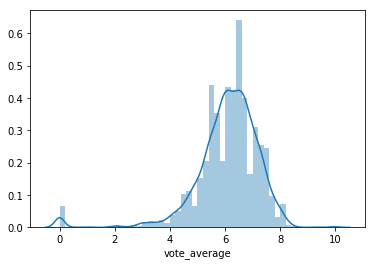

In [4]:
sns.distplot(movies_data.vote_average)

Pair plot визуализация показывает, как связаны между собой различные признаки. В данном случае рассматриваем бюджет на производство фильма, доход от него и рейтинг. Рейтинг слабо коррелируется с бюджетом и доходом. зависимость бюджета от дохода проглядывается. Далее рассмотри подробнее. 

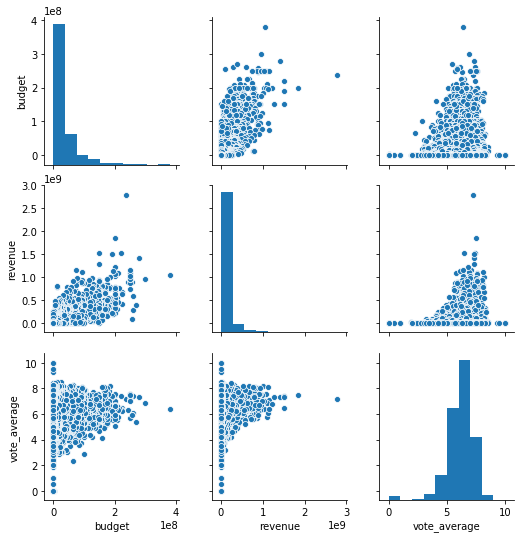

In [5]:
sns_plot = sns.pairplot(
    movies_data[['budget', 'revenue', 'vote_average']])
sns_plot

Для того чтобы подробнее посмотреть взаимосвязь бюджета на производство и дохода с фильма используем joint_plot.

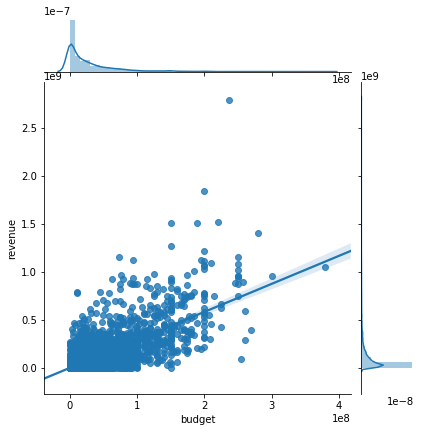

In [7]:
sns.jointplot(x='budget', y='revenue', 
              data=movies_data, kind='reg')